# Exponential curve fitting 

Given data points $(x_1, y_1) (x_1, y_1), ... (x_{50}, y_{50})$ **below*, find the curve in the form $y_i = c*e^{ax}$ that "best" fit data

In [2]:
using CSV, DataFrames, Plots 
df = CSV.read("exp.csv", DataFrame)

Row,x1,x2
,Float64,Float64
1,4.38,14.43
2,3.91,11.32
3,6.37,44.76
4,4.88,21.04
5,5.38,26.37
6,1.69,3.16
7,5.85,33.8
8,4.77,17.36
9,2.66,8.0


### step 1: plot (x, y)

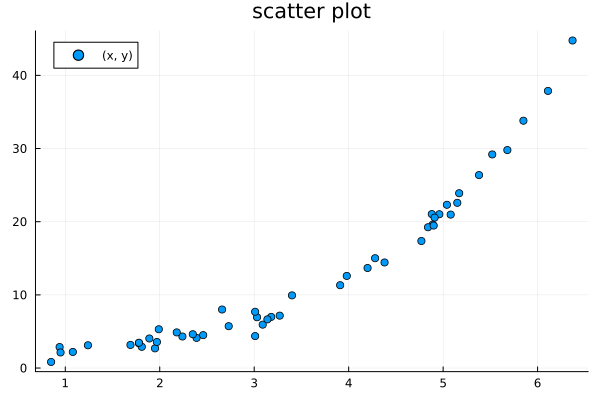

In [5]:
xy = Matrix(df)
scatter(xy[:, 1], xy[:, 2], label="(x, y)", title="scatter plot")

### Step 2

the plot suggests the relationship between x, y can be described by exponential function 

\begin{align} 

y = c*e^{ax} \\


\ln(y) = \ln(c) + a*x_i \\

\end{align}

The problem of finding the "best" curve $ y = c*e^{ax} $ can be reduced to finding the "best" line $ z = ax + b, z = \ln(y), b = \ln(c)$ 

-  2.1 create new data column $ z_i  = \ln(y_i), i = 1, 2, ..., 50 $ 
-  2.2 Calculate the "best" coefficients a, b for the line equation $ z = ax + b, z = \ln(y), b = \ln(c)$

In [7]:
x = xy[:, 1]
y = xy[:, 2]
z = log.(y)

50-element Vector{Float64}:
  2.6693093727857793
  2.4265710727750367
  3.8013148834437245
  3.046425387869509
  3.2722270003651954
  1.1505720275988207
  3.520460802488973
  2.854168709232204
  2.0794415416798357
  1.3962446919730587
  ⋮
  1.8946168546677629
  3.105035008444441
  2.9569914452375605
  3.1170645587215158
  2.0399207835175526
  2.7087166456453704
 -0.18632957819149348
  2.968874819384108
  0.7884573603642703

In [11]:
Y = round.([sum(x.*z) ; sum(z)], digits=2)
println("Y =", Y)
M = [sum(x.^2) sum(x); sum(x) 50]


Y =[440.23, 107.46]


2×2 Matrix{Float64}:
 714.72  172.31
 172.31   50.0

In [12]:
ab = M \ Y
a = ab[1]
b = ab[2]
c = exp(b)

using Printf 
@printf("Critical point (a, b) = (%.3f, %.3f), c=%.3f \n", a, b, c)

Critical point (a, b) = (0.578, 0.157), c=1.170 


## Step 3

One way to find the "best" coefficients "a" and "b" is to minimize the sum of square of the errors, where each error is the difference between the predicted value produced by the model $\hat{z_i} = a*x_i + b$ and $ z_i = \ln(y_i) $ from the given 50 pairs of data
 

I.e. find "a", and "b" to minimize function $E(a, b) = \sum_{i=1}^{50}[z_i - (a*x_i + b)]^2$

To minimize $ E(a, b) $, first take the partial derivatives, set them to zero, to find critical points

\begin{align}
    \frac{\partial E}{\partial a} = \sum_{i=1}^{50} 2*(z_i - (a*x_i + b)) * {-x_i} = 0 \\
    \frac{\partial E}{\partial b} = \sum_{i=1}^{50} 2*(z_i - (a*x_i + b)) * (-1) = 0 
\end{align}

to find critical points (a,b) dividing both *above* by 2, then solve for a and b
\begin{align} 
    \sum_{i=1}^{50}[z_i-(a*x_i)+b] * (-x_i) = 0 \\
    \sum_{i=1}^{50}[z_i-(a*x_i)+b] * (-1) = 0 \\
    <=> \\
    \sum_{i=1}^{50}[-z_i*x_i+(a*x_i^2+b*x_i)] = 0 \\
    \sum_{i=1}^{50}[-z_i*+(a*x_i+b*1)] = 0 \\
    <=> \\
    \sum_{i=1}^{50}{x_i^2} *a+\sum_{i=1}^{50}x_i*b = \sum_{i=1}^{50}x_i*z_i \\
    \sum_{i=1}^{50}{x_i} * a+\sum_{i=1}^{50}b*1=\sum_{i=1}^{50}z_i \\
    <=> \\
    714.72*a + 172.31*b = 440.23 \\
    172.31*a+ 50*b =  107.46
\end{align}

Solving system of 2 equations (10), (11) gives

- a = 0.578
- b = 0.156

I.e. we found the critical point (a, b) = (0.578, 0.157) for the total sum of deviations $E(a, b) = \sum_{i=1}^{50}[z_i - (a*x_i + b)]^2$ 

### step 4: Use second derivative test to find min

To determine if critical point (a, b) = (0.578, 0.156) is the max or the min, we take the second partial derivatives

\begin{align}
A = \frac{\partial^{2}E}{\partial a^{2}} = \frac{\partial}{\partial a}(\sum_{i=1}^{50}x_i^2*a + \sum_{i=1}^{50}x_i*b - \sum_{i=1}^{50}x_i*z_i) \\

B = \frac{\partial^{2}E}{\partial a\partial b} = \frac{\partial}{\partial b}(\sum_{i=1}^{50}x_i^2*a + \sum_{i=1}^{50}x_i*b - \sum_{i=1}^{50}x_i*z_i) \\ 

C = \frac{\partial^{2}E}{\partial b^{2}} = \frac{\partial}{\partial a}(\sum_{i=1}^{50}x_i*a + \sum_{i=1}^{50}1*b - \sum_{i=1}^{50}z_i) \\
<=> \\
A = \sum_{i=1}^{50}x_i^2 = 714.72 \\

B = \sum_{i=1}^{50} x_i = 172.31 \\

C = \sum_{i=1}^{50} 1 = 50 \\

A*C - B^2 = 714.72 * 50 - 172.31^2 = 6045.3 > 0 \\

A = 714.72 > 0

\end{align}

Because $ A*C - B^2 > 0 $ and $A > 0 $, the error function $ E(a, b) = \sum_{i=1}^{50}[z_i - (a*x_i+b)]^2 $ evaluated at (a, b) = (0.578, 0.156) is the minimum, per second derivative test 

Hence the line $ z = ax + b = 0.578*x + 0.156 $ "best" fit the log data $ (z_1, z_2, ..., z_{50}) $

Or $ y = c*e^{ax} = 1.169 * e^{0.578*x} $ is the "best" exponential curve that fit the 50 pairs of original data

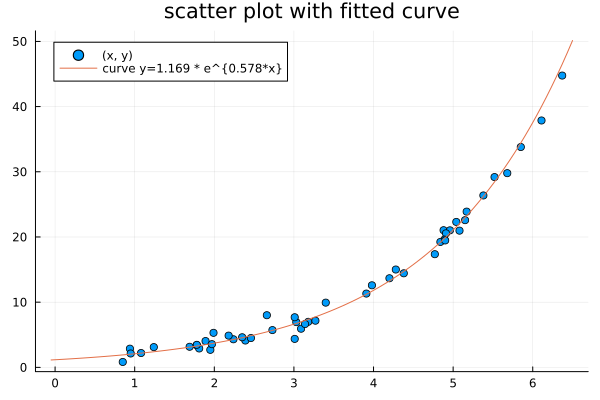

In [17]:
scatter(xy[:, 1], xy[:, 2], label="(x, y)", title="scatter plot with fitted curve")
x = range(-0.05, 6.5, length = 100)
y = c*exp.(a*x)
plot!(x, y, label="curve y=1.169 * e^{0.578*x}")